In [1]:
library(readr) # for importing the datafile
library(afex) # for the anova
library(tidyverse) # for restructuring it
library(rstatix) # for testing assumptions
library(ggpubr) # for graphical test of normality
library(emmeans) # for post-hoc tests


Loading required package: lme4

Loading required package: Matrix

************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- NEWS: emmeans() for ANOVA models now uses model = 'multivariate' as default.
- Get and set global package options with: afex_options()
- Set orthogonal sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************


Attaching package: ‘afex’


The following object is masked from ‘package:lme4’:

    lmer


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.7
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyvers

In [3]:
d_long <- read.csv("eda/eda_long_kombiniert.csv", sep=",")
names(d_long)[names(d_long) == "puls"] <- "pulse"
d_long

prob_nr,time,eda,age,sex,group,phase,trial_type,condition,repetition,run
<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>
9,0,1.86e-05,30,M,Sound,-1,pause,pause,0,1
15,0,5.7000000000000005e-06,23,F,Sound,-1,pause,pause,0,1
28,0,9.800000000000001e-06,24,F,Musik,-1,pause,pause,0,1
20,0,8.8e-06,22,F,Sound,-1,pause,pause,0,1
24,0,3.6000000000000003e-06,25,M,Musik,-1,pause,pause,0,1
12,0,7.1e-06,21,F,Sound,-1,pause,pause,0,1
14,0,1.74e-05,23,F,Musik,-1,pause,pause,0,1
19,0,2.8800000000000002e-05,24,M,Musik,-1,pause,pause,0,1
3,0,1.98e-05,23,M,Musik,-1,pause,pause,0,1


In [10]:
d_long$type <- as.factor(d_long$trial_type)
d_long$condition <- as.factor(d_long$condition)
d_long$group <- as.factor(d_long$group)
d_long$sex <- as.factor(d_long$sex)
d_long$eda <- as.numeric(d_long$eda)
d_long$time<- as.factor(paste(d_long$run, d_long$repetition, sep = "_"))

# bad data structure. See what happens if I eliminate all rows that are "pause" in "condition"

d_long_new <- d_long[d_long$condition != "pause", ] 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [11]:
d_long_new


,prob_nr,time,eda,age,sex,group,phase,trial_type,condition,repetition,run,type
,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<int>,<chr>,<fct>,<int>,<int>,<fct>
133,9,1_1,2.15e-05,30,M,Sound,0,rotation,relax,1,1,rotation
134,23,1_1,2.10e-06,23,F,Musik,0,rotation,relax,1,1,rotation
135,20,1_1,8.90e-06,22,F,Sound,0,rotation,relax,1,1,rotation
136,16,1_1,1.12e-05,25,M,Musik,0,rotation,relax,1,1,rotation
137,14,1_1,1.72e-05,23,F,Musik,0,rotation,relax,1,1,rotation
138,26,1_1,4.90e-06,24,M,Musik,0,rotation,relax,1,1,rotation
139,12,1_1,7.60e-06,21,F,Sound,0,rotation,relax,1,1,rotation
140,15,1_1,5.90e-06,23,F,Sound,0,rotation,relax,1,1,rotation
141,19,1_1,2.98e-05,24,M,Musik,0,rotation,relax,1,1,rotation


In [ ]:
# our four factors are:
# music vs sound (d_long$group, btw)
# stress vs relaxation (d_long$type, wth)
# maths vs rotation (d_long$condition, wth)
# run + repetition within run (d_long$time, wth)
# 
# covariates are:
# age (d_long$age, btw)
# gender (d_long$sex, btw)

Test assumptions

In [12]:
# 1) normality

d_long_new %>%
  group_by(time, type, condition, group) %>%
  shapiro_test(eda)

d_long_new %>%
  group_by(time, type, condition, group) %>%
  summary()

time,group,condition,type,variable,statistic,p
<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
1_1,Musik,relax,math,eda,0.7545841,1.497510e-31
1_1,Sound,relax,math,eda,0.8362742,4.730985e-23
1_1,Musik,stress,math,eda,0.7772391,1.346264e-30
1_1,Sound,stress,math,eda,0.9083926,2.089074e-17
1_1,Musik,relax,rotation,eda,0.7598363,1.178780e-31
1_1,Sound,relax,rotation,eda,0.8652626,1.364571e-20
1_1,Musik,stress,rotation,eda,0.7687465,5.082465e-31
1_1,Sound,stress,rotation,eda,0.8704858,8.383085e-21
1_2,Musik,relax,math,eda,0.7544967,6.260891e-32


    prob_nr       time           eda             age        sex      
 Min.   : 2.00   1_0:   0   Min.   :0e+00   Min.   :21.00   F: 9560  
 1st Qu.:12.00   1_1:5280   1st Qu.:0e+00   1st Qu.:23.00   M:11472  
 Median :18.00   1_2:5236   Median :0e+00   Median :23.50            
 Mean   :17.32   2_0:   0   Mean   :0e+00   Mean   :23.91            
 3rd Qu.:24.00   2_1:5280   3rd Qu.:0e+00   3rd Qu.:25.00            
 Max.   :29.00   2_2:5236   Max.   :1e-04   Max.   :30.00            
                            NA's   :700                              
   group           phase      trial_type         condition       repetition   
 Musik:12428   Min.   :0.0   Length:21032       pause :    0   Min.   :1.000  
 Sound: 8604   1st Qu.:2.0   Class :character   relax : 9274   1st Qu.:1.000  
               Median :3.0   Mode  :character   stress:11758   Median :1.000  
               Mean   :3.5                                     Mean   :1.498  
               3rd Qu.:6.0                   

In [13]:
ggqqplot(d_long_new[group = 'Musik'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Musikbedingung') +
  facet_grid(time ~ type)

ggqqplot(d_long_new[group = 'Sound'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ type)

ggqqplot(d_long_new[group = 'Sound'], "puls", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ group)

ggqqplot(d_long_new[group = 'Sound'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(time ~ group)


ggqqplot(d_long_new[group = 'Musik'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Musikbedingung') +
  facet_grid(time ~ type)

ggqqplot(d_long_new[group = 'Sound'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ type)

ggqqplot(d_long_new[group = 'Sound'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ group)

ggqqplot(d_long_new[group = 'Sound'], "pulse", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(time ~ group)

# qqplots show that distribution is mostly OK

ERROR: Error in `[.data.frame`(d_long_new, group = "Musik"): unused argument (group = "Musik")


In [6]:
# Installing
install.packages("readr")
# Loading
library("readr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [14]:
# 2) homogeneity of variance (only for between-subject factors)

d_long %>%
  group_by(run, phase) %>%
  levene_test(eda ~ group)
# not given, we need to correct the results.

phase,run,df1,df2,statistic,p
<int>,<int>,<int>,<int>,<dbl>,<dbl>
-1,1,1,5252,400.33347,6.888902e-86
0,1,1,1261,87.12329,4.444200e-20
1,1,1,1265,107.58460,3.009714e-24
2,1,1,1282,108.67826,1.759882e-24
3,1,1,1276,111.61639,4.541908e-25
4,1,1,1229,109.13727,1.557490e-24
5,1,1,1271,93.39425,2.279136e-21
6,1,1,1277,84.98670,1.201497e-19
7,1,1,1289,98.09217,2.447810e-22


In [ ]:
# 3) assumption of sphericity (only for within-subject factors)

# will be checked and corrected for automatically when computing the ANOVA. Look at that then.

Define model 

In [15]:
model1 <- aov_ez("prob_nr", # Variable/column defining your participants
       "eda", # dv
       d_long, # name of your dataframe
       between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
       within = c("time", "condition", "type"), 
       include_aov = TRUE)


model1
summary(model1)

ERROR: Error: Empty cells in within-subjects design  (i.e., bad data structure).
table(data[c("time", "condition", "type")])
# , , type = math
# 
#       condition
# time   pause relax stress
#   X1_0     0     0      0
#   X1_1     0  1320   1320
#   X1_2     0  1298   1320
#   X2_0     0     0      0
#   X2_1     0  1320   1320
#   X2_2     0    78   2540
# 
# , , type = pause
# 
#       condition
# time   pause relax stress
#   X1_0  5397     0      0
#   X1_1     0     0      0
#   X1_2     0     0      0
#   X2_0  5397     0      0
#   X2_1     0     0      0
#   X2_2     0     0      0
# 
# , , type = rotation
# 
#       condition
# time   pause relax stress
#   X1_0     0     0      0
#   X1_1     0  1298   1342
#   X1_2     0  1298   1320
#   X2_0     0     0      0
#   X2_1     0  1342   1298
#   X2_2     0  1320   1298
# 


In [16]:
# with pause excluded

model1 <- aov_ez("prob_nr", # Variable/column defining your participants
                 "eda", # dv
                 d_long_new, # name of your dataframe
                 between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
                 within = c("time", "condition", "type"), 
                 include_aov = TRUE)
model1
summary(model1)


# we see that the assumption of sphericity was corrected for using the Greenhouse-Geisser correction
# we also see that we have an effect for time
# and for time*condition*type

Warning message:
“More than one observation per cell, aggregating the data using mean (i.e, fun_aggregate = mean)!”
Warning message:
“Missing values for following ID(s):
3, 5, 9, 11, 12, 13, 14, 15, 16, 17, 20, 21, 24, 26, 27, 28
Removing those cases from the analysis.”
Contrasts set to contr.sum for the following variables: group, sex



ERROR: Error in aov_car(formula = as.formula(formula), data = data, fun_aggregate = fun_aggregate, : Some parameters are not estimable, most likely due to empty cells of the design (i.e., structural missings). Check your data.


# post hoc tests:

In [17]:
m1_ph <- emmeans(model1, "time") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m1_ph
pairs(m1_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

ERROR: Error in is(object, "emmGrid"): object 'model1' not found


In [37]:
c1 <- list(run1vsrun2 = c(1, 1, -1, -1), 
           run1wdh = c(1, -1, 0, 0),
           run2wdh = c(0, 0, 1, -1)# this vector gives each line in the object 'm1_ph' a weight
          )

# if several contrasts are defined, these go into a list of vectors and each get their own name.
  
contrast(m1_ph, c1, adjust = "holm") # here we define how to adjust the alpha-level, specified here is the Bonferroni-Holm correction, 
                                     # which is less strict than the Bonferroni correction

# and we see: there is a difference, t(20) = 3.222, p = 0.0043

 contrast   estimate    SE df t.ratio p.value
 run1vsrun2    4.898 1.520 20   3.222  0.0085
 run1wdh       4.333 0.909 20   4.765  0.0004
 run2wdh       0.615 0.310 20   1.981  0.0615

Results are averaged over the levels of: group, sex, type, condition 
P value adjustment: holm method for 3 tests 

plots

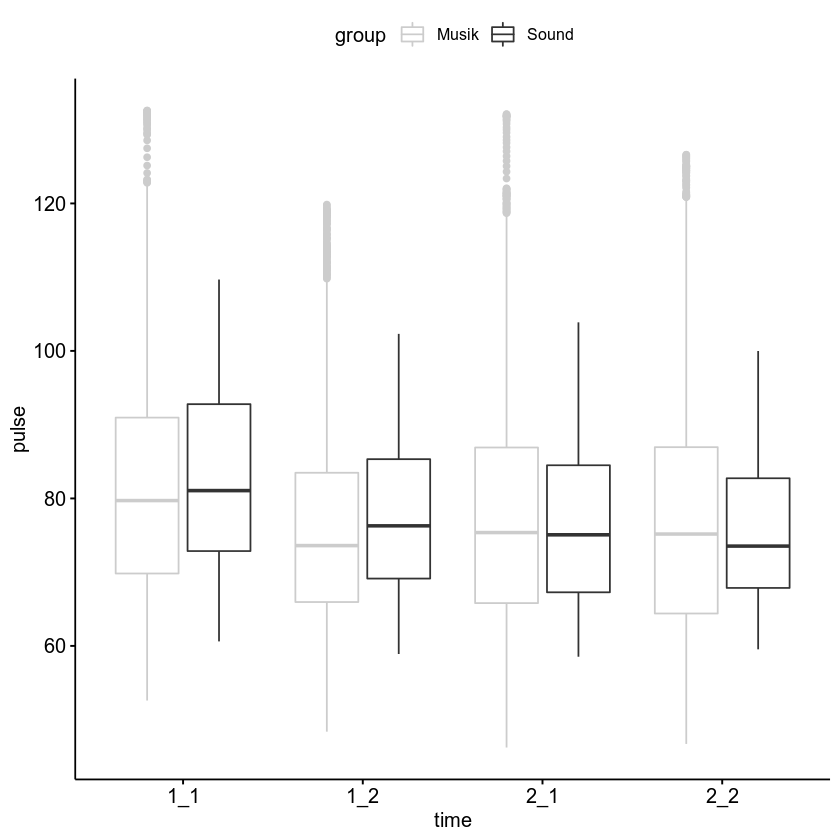

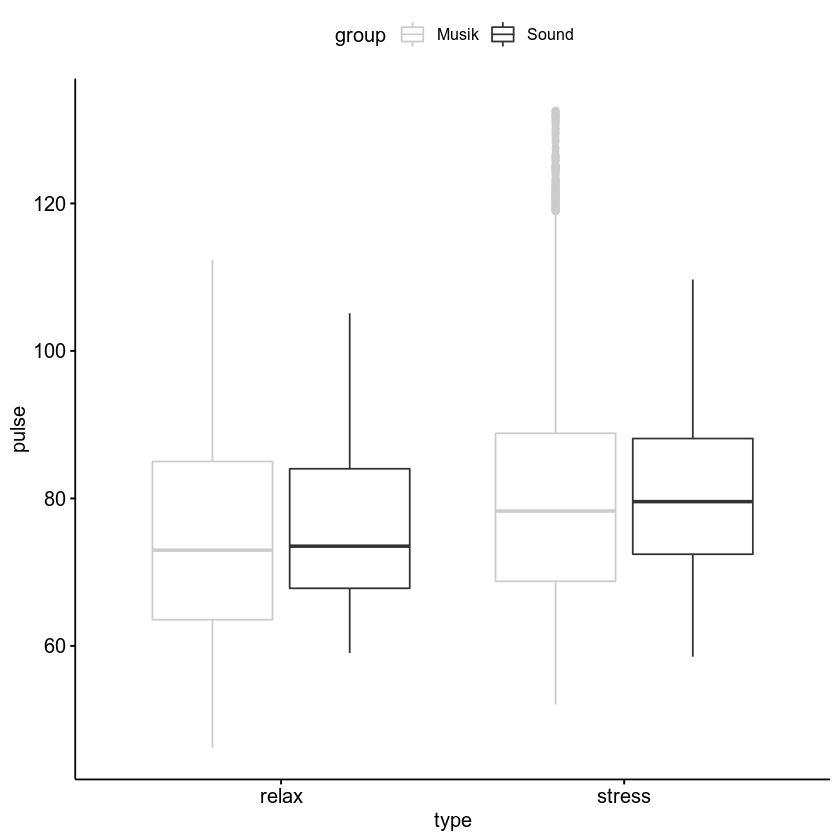

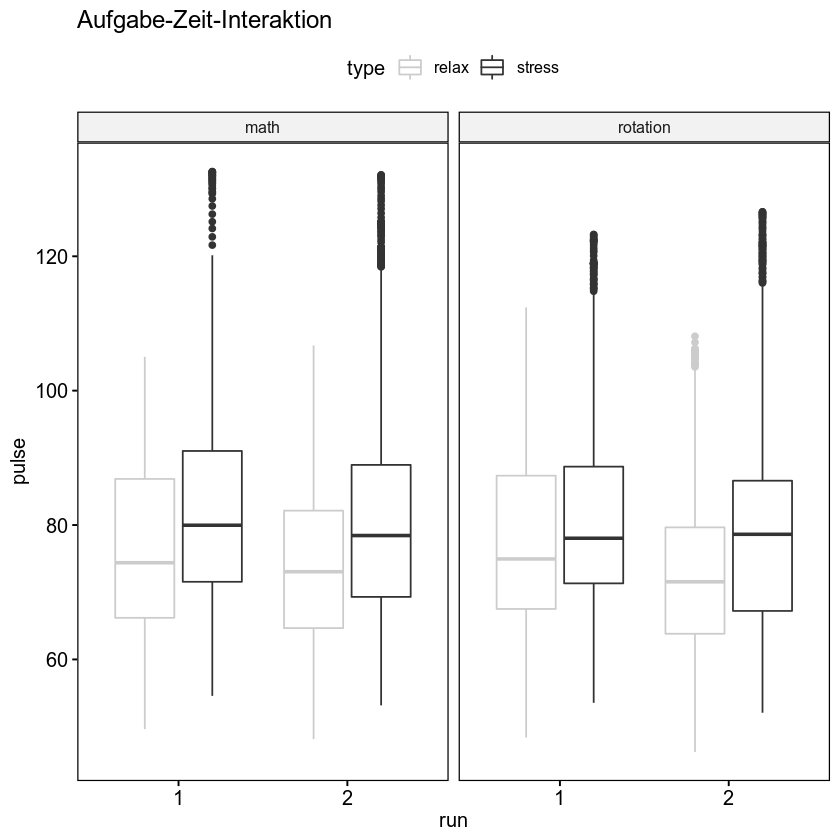

In [39]:
p_groupxtime <- ggboxplot(
  d_long_new, x = "time", y = "pulse",
  color = "group", palette = "grey"
)
p_groupxtime
  

p_groupxtype <- ggboxplot(
  d_long_new, x = "type", y = "pulse",
  color = "group", palette = "grey"
)
p_groupxtype 


p_timextype1 <- ggboxplot(
  d_long_new, x = "run", y = "pulse", facet.by = "condition",
  color = "type", palette = "grey", title = "Aufgabe-Zeit-Interaktion",
)
p_timextype1